In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed_logs.csv")
df.head()


,timestamp,username,ip_address,event_type,status
0,2025-01-01 09:00:01,admin,192.168.1.10,login,failed
1,2025-01-01 09:00:05,admin,192.168.1.10,login,failed
2,2025-01-01 09:00:08,admin,192.168.1.10,login,failed
3,2025-01-01 09:00:12,admin,192.168.1.10,login,failed
4,2025-01-01 09:00:15,admin,192.168.1.10,login,failed


In [4]:
%matplotlib inline


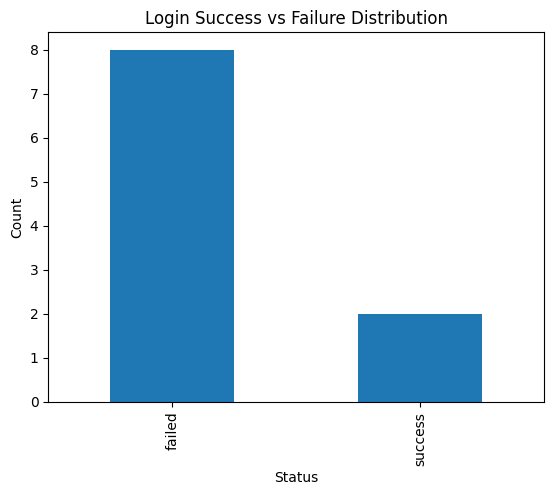

In [5]:
df["status"].value_counts().plot(kind="bar")
plt.title("Login Success vs Failure Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()


### Analyst Observation – Authentication Outcome
The volume of failed authentication attempts exceeds successful logins.
This pattern is commonly observed during credential-based attacks such as
brute-force or password spraying, where attackers repeatedly attempt access
using automated methods.


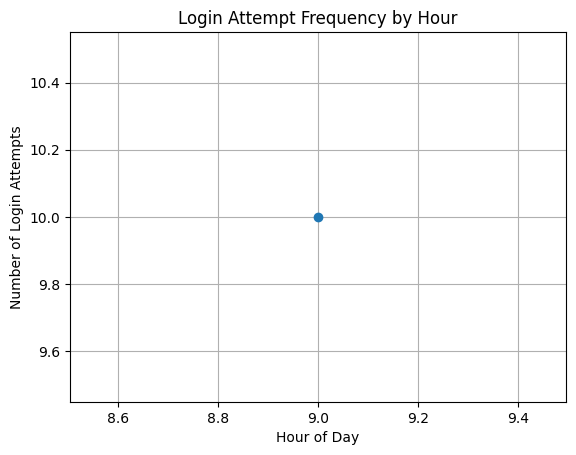

In [6]:
df["hour"] = pd.to_datetime(df["timestamp"]).dt.hour

df.groupby("hour").size().plot(kind="line", marker="o")
plt.title("Login Attempt Frequency by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Login Attempts")
plt.grid(True)
plt.show()


### Analyst Observation – Temporal Pattern
Login attempts are clustered within narrow time windows rather than being
evenly distributed throughout the day. Such concentration strongly suggests
automated activity instead of normal user behavior.


In [7]:
alerts = pd.read_csv("../output/flagged_events.csv")
alerts


,ip_address,username,failed_attempts
0,192.168.1.10,admin,5


## SOC Conclusion
This analysis demonstrates how rule-based detection can effectively identify
suspicious authentication behavior by correlating frequency, timing, and
repetition of failed login attempts. The approach mirrors real-world SOC
workflows where analysts rely on log analysis as an initial detection layer
before escalation to advanced analytics or incident response.
